In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tau_m = 10.0           # 膜时间常数
dt = 1.0               # 时间步长
V = 0.0                # 初始膜电位
R = 1.0                # 膜电阻
V_th = 1.0             # 阈值
V_reset = 0.0          # 重置电位
time_steps = 100       # 时间步
V_trace = []           # 记录膜电位随时间变化
spike_times = []       # 记录尖峰触发时刻

I = np.random.uniform(0.5, 2.5, time_steps)
I = np.round(I, 2)
# 随机输入电流

for t in range(time_steps):

    V = V + (dt / tau_m) * (-V + R * I[t])

    if V >= V_th:
        spike_times.append(t * dt)
        V_trace.append(V)
        V = V_reset
    else:
        V_trace.append(V)

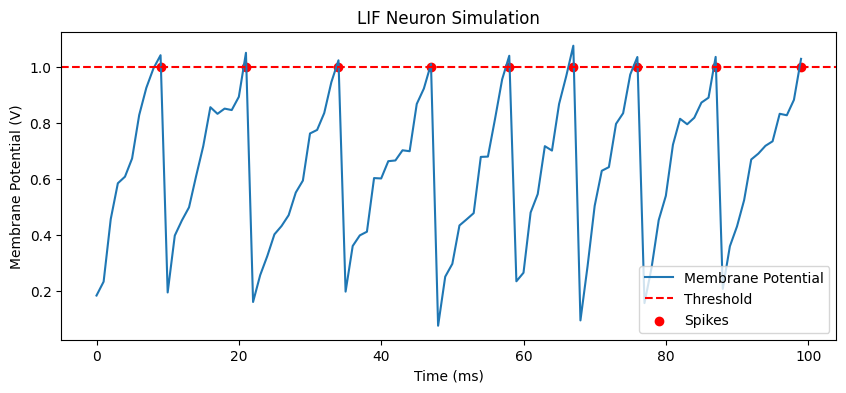

In [3]:
plt.figure(figsize=(10, 4))
plt.plot(np.arange(0, time_steps * dt, dt), V_trace, label="Membrane Potential")
plt.axhline(y=V_th, color='r', linestyle='--', label="Threshold")
plt.scatter(spike_times, [V_th] * len(spike_times), color='red', label="Spikes")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (V)")
plt.title("LIF Neuron Simulation")
plt.legend()
plt.show()